<a href="https://colab.research.google.com/github/Janeiii/COGS109_Project/blob/main/COGS109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [2]:
#Loading dataset
data = pd.read_csv('/content/watermelon_data.csv')
#data = data.drop(columns = 'Num')
data.head()

,Num,Color,Root,Sound,Texture,Belly_button,Touch,Density,sugar_rate,GB
0,1,Green,rolled up,turbid,clear,sunken,slippery,0.697,0.460,Yes
1,2,Dark,rolled up,low,clear,sunken,slippery,0.774,0.386,Yes
2,3,Dark,rolled up,turbid,clear,sunken,slippery,0.634,0.264,No
3,4,Green,rolled up,low,clear,sunken,slippery,0.608,0.318,Yes
4,5,light,rolled up,turbid,clear,sunken,slippery,0.556,0.215,Yes


In [3]:
data.info()

print("Column items in the dataset:")
print(data.columns.values)

print("Categorical columns:")
cat_cols = data.select_dtypes(include = 'object').columns.values
print(cat_cols)

print("Numerical columns:")
numeric_cols = data.select_dtypes(include = np.number).columns.values
print(numeric_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Num           209 non-null    int64  
 1   Color         209 non-null    object 
 2   Root          209 non-null    object 
 3   Sound         209 non-null    object 
 4   Texture       209 non-null    object 
 5   Belly_button  209 non-null    object 
 6   Touch         209 non-null    object 
 7   Density       209 non-null    float64
 8   sugar_rate    209 non-null    float64
 9   GB            209 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 16.5+ KB
Column items in the dataset:
['Num' 'Color' 'Root' 'Sound' 'Texture' 'Belly_button' 'Touch' 'Density'
 'sugar_rate' 'GB']
Categorical columns:
['Color' 'Root' 'Sound' 'Texture' 'Belly_button' 'Touch' 'GB']
Numerical columns:
['Num' 'Density' 'sugar_rate']


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

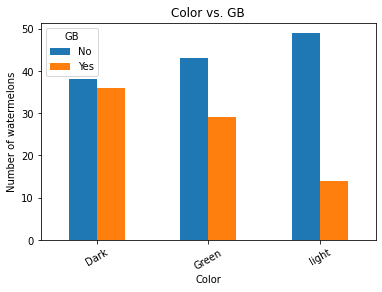

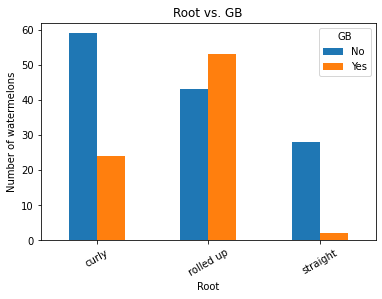

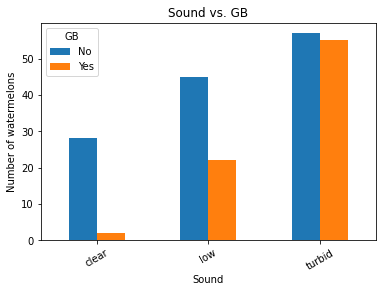

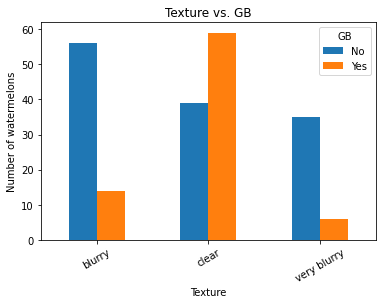

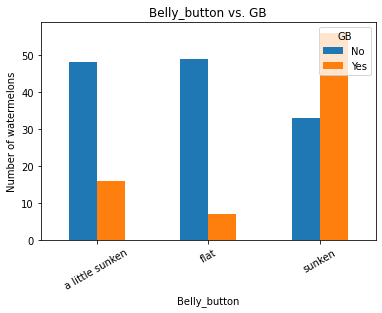

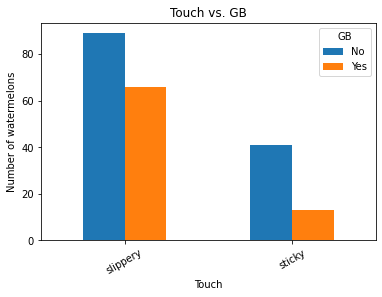

In [4]:
%matplotlib inline
pd.crosstab(data.Color,data.GB).plot(kind='bar')
plt.title('Color vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")
pd.crosstab(data.Root,data.GB).plot(kind='bar')
plt.title('Root vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")
pd.crosstab(data.Sound,data.GB).plot(kind='bar')
plt.title('Sound vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")
pd.crosstab(data.Texture,data.GB).plot(kind='bar')
plt.title('Texture vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")
pd.crosstab(data.Belly_button,data.GB).plot(kind='bar')
plt.title('Belly_button vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")
pd.crosstab(data.Touch,data.GB).plot(kind='bar')
plt.title('Touch vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")

In [5]:
#Import label encoder
  
#label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
  
#Encode labels in column Sex and Embarked
data['Color']= label_encoder.fit_transform(data['Color'])
data['Root']=label_encoder.fit_transform(data['Root'])
data['Sound']=label_encoder.fit_transform(data['Sound'])
data['Texture']=label_encoder.fit_transform(data['Texture'])
data['Touch']=label_encoder.fit_transform(data['Touch'])
data['Belly_button']=label_encoder.fit_transform(data['Belly_button'])
data['GB'] = label_encoder.fit_transform(data['GB'])

data

,Num,Color,Root,Sound,Texture,Belly_button,Touch,Density,sugar_rate,GB
0,1,1,1,2,1,2,0,0.697,0.460,1
1,2,0,1,1,1,2,0,0.774,0.386,1
2,3,0,1,2,1,2,0,0.634,0.264,0
3,4,1,1,1,1,2,0,0.608,0.318,1
4,5,2,1,2,1,2,0,0.556,0.215,1
...,...,...,...,...,...,...,...,...,...,...
204,214,0,1,2,1,2,0,0.635,0.271,1
205,215,0,0,1,0,0,0,0.666,0.089,0
206,216,1,2,0,1,1,1,0.244,0.268,0
207,217,2,2,0,2,1,0,0.245,0.058,0


In [6]:
data.corr().sort_values(by = 'GB', ascending= False)

,Num,Color,Root,Sound,Texture,Belly_button,Touch,Density,sugar_rate,GB
GB,-0.169716,-0.217918,-0.028115,0.299536,0.040850,0.355830,-0.167072,0.294923,0.439691,1.000000
sugar_rate,-0.017880,-0.472871,-0.053219,0.196644,-0.063852,0.334799,0.171507,0.159320,1.000000,0.439691
Belly_button,0.063112,0.260851,0.174617,0.063818,0.043171,1.000000,-0.444588,0.371337,0.334799,0.355830
Sound,-0.094284,-0.193492,-0.575758,1.000000,-0.005738,0.063818,0.042421,0.302486,0.196644,0.299536
Density,0.036008,-0.219253,-0.380027,0.302486,-0.524352,0.371337,-0.689016,1.000000,0.159320,0.294923
Texture,0.013344,0.359867,0.607026,-0.005738,1.000000,0.043171,0.190866,-0.524352,-0.063852,0.040850
Root,0.077841,0.336450,1.000000,-0.575758,0.607026,0.174617,0.010987,-0.380027,-0.053219,-0.028115
Touch,-0.047968,-0.123898,0.010987,0.042421,0.190866,-0.444588,1.000000,-0.689016,0.171507,-0.167072
Num,1.000000,0.044127,0.077841,-0.094284,0.013344,0.063112,-0.047968,0.036008,-0.017880,-0.169716
Color,0.044127,1.000000,0.336450,-0.193492,0.359867,0.260851,-0.123898,-0.219253,-0.472871,-0.217918


If we were to use 0.1 as the threshold, we noticed that all the predictors are correlated with the outcome 'GB', except for 'Texture' and 'Root'. However, 0.1 is not significant enough for us to conclude the correlation. If we were to elevate our threshold to 0.3, we will noticed that only 'Belly_button' and 'sugar_rate' meets the threshold, we might not have a sufficient number of predictos to predict the dataset if we use such threshold. As the highest correlation is 0.439, we decide to use a threshold of 0.25 as the mid point that helps us to determinine which predictors are going to be sufficient to use as good predictors.

LOGISTIC

In [7]:
import statsmodels.formula.api as smf

logistic1 = smf.logit(formula= 'GB ~ Belly_button + sugar_rate + Sound + Density', data= data)
fitted = logistic1.fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.489081
         Iterations 7


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     GB   No. Observations:                  209
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            4
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.2624
Time:                        06:11:05   Log-Likelihood:                -102.22
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 6.023e-15
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.5367      1.061     -5.219      0.000      -7.616      -3.458
Belly_button     0.4552      0.242      1.878      0.060      -0.020       0.930
sugar_rate       7.0043      1.548      4.524      0.000       3.970      10.039
Sound            0.9892      0.314      3.148      0.002       0.373       1.605
Density          2.6041      1.496      1.741      0.082      -0.327       5.536
================================================================================
"""

In [8]:
import statsmodels.formula.api as smf

logistic1 = smf.logit(formula= 'GB ~ sugar_rate + Sound', data= data)
fitted = logistic1.fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.529724
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     GB   No. Observations:                  209
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.2011
Time:                        06:11:05   Log-Likelihood:                -110.71
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 7.876e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5237      0.546     -6.454      0.000      -4.594      -2.454
sugar_rate     7.7485      1.435      5.400      0.000       4.936      10.561
Sound          0.8867      0.258      3.439      0.001       0.381       1.392
==============================================================================
"""

In [9]:
feature_cols = ['Sound', 'Belly_button', 'sugar_rate']
X = data[feature_cols] # Features
y = data.GB # Target variable
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=2)

In [10]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

Text(0.5, 257.44, 'Predicted label')

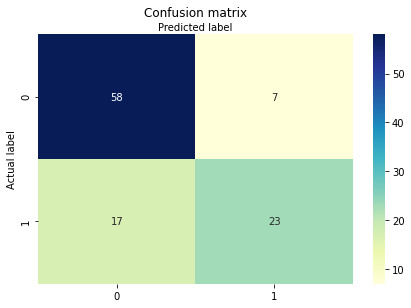

In [11]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# import required modules
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7714285714285715
Precision: 0.7666666666666667
Recall: 0.575


Accuracy: 0.6761904761904762
Precision: 0.6363636363636364
Recall: 0.35


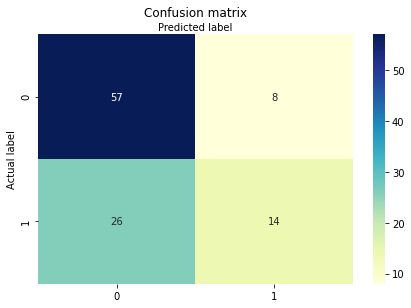

In [13]:
feature_cols = ['Sound', 'sugar_rate']
X = data[feature_cols] # Features
y = data.GB # Target variable
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=2)
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

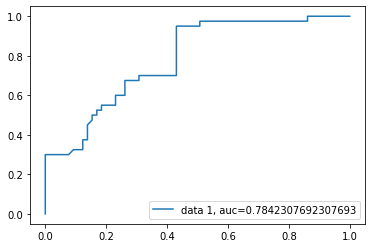

In [14]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

LOGIC - CROSS VALIDATION

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.63636364 0.63636364 0.54545455 0.63636364 0.6        0.6
 0.5        0.5        0.6        0.4       ]


In [16]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.4, 0.5654545454545454, 0.6363636363636364)

The range of the accuracy is between 0.50 to 0.93 but generally 0.72 on average

KNN


In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=9) #try for k = 7, 9; best is 9
model.fit(X_train,y_train) #train model
predicted = model.predict(X_test) # predict output


In [18]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#increasing the number of newighbors increases the accuract 
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7523809523809524


In [19]:
# confusion matrix
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test, predicted, labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# the sensitivity = TP / P = TP / (FN + TP) fraction of good watermelons correclty classified
print("The sensitivity is: ", tp / (fn+tp))

# the specificity = TN / N = TN / (TN + FP) fraction of bad watermelons correctly classified as bad
print("The specificity is: ", tn / (tn+fp))

Confusion matrix : 
 [[19 21]
 [ 5 60]]
Outcome values : 
 19 21 5 60
The sensitivity is:  0.475
The specificity is:  0.9230769230769231


KNN - CROSS-VALID (TUNNING)

In [20]:
#elbow curve for the error rate; train with differnet k valyes
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_list = [] #to store rmse values for different k
for K in range(1,40):
    
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train,y_train) #train model
    pred_k = model.predict(X_test) # predict output
    
    error = sqrt(mean_squared_error(y_test,pred_k)) #calculate rmse
    rmse_list.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.42538497969766276
RMSE value for k=  2 is: 0.40237390808147827
RMSE value for k=  3 is: 0.3518657752744984
RMSE value for k=  4 is: 0.3779644730092272
RMSE value for k=  5 is: 0.3518657752744984
RMSE value for k=  6 is: 0.5163977794943222
RMSE value for k=  7 is: 0.5163977794943222
RMSE value for k=  8 is: 0.5255382728122436
RMSE value for k=  9 is: 0.4976133515281193
RMSE value for k=  10 is: 0.4879500364742666
RMSE value for k=  11 is: 0.4879500364742666
RMSE value for k=  12 is: 0.4879500364742666
RMSE value for k=  13 is: 0.50709255283711
RMSE value for k=  14 is: 0.5163977794943222
RMSE value for k=  15 is: 0.5163977794943222
RMSE value for k=  16 is: 0.5163977794943222
RMSE value for k=  17 is: 0.5163977794943222
RMSE value for k=  18 is: 0.5163977794943222
RMSE value for k=  19 is: 0.50709255283711
RMSE value for k=  20 is: 0.5936168397046637
RMSE value for k=  21 is: 0.5855400437691199
RMSE value for k=  22 is: 0.5855400437691199
RMSE value for k=  23

Text(0, 0.5, 'Error Rate')

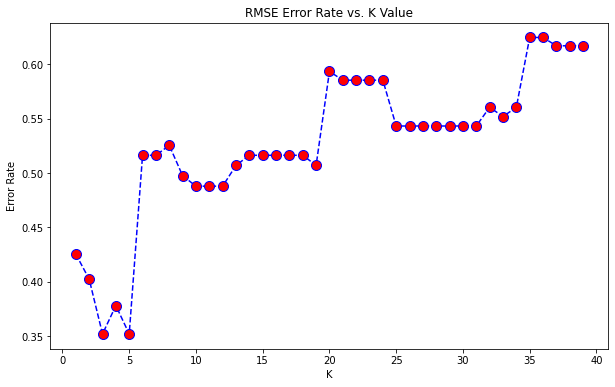

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), rmse_list, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('RMSE Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
# retrain with new K vale of 5
# We retrained the dataset with the new optimjal value
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=5) #try for k = 7, 9; best is 9
model.fit(X_train,y_train) #train model
predicted = model.predict(X_test) # predict output

print("Accuracy:",metrics.accuracy_score(y_test, predicted))

matrix = confusion_matrix(y_test, predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

print(classification_report(y_test, predicted))

Accuracy: 0.8761904761904762
Confusion matrix : 
 [[30 10]
 [ 3 62]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91        65
           1       0.91      0.75      0.82        40

    accuracy                           0.88       105
   macro avg       0.89      0.85      0.86       105
weighted avg       0.88      0.88      0.87       105

